In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from torch.utils.data import random_split
from numpy import vstack
from numpy import argmax
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from torch import Tensor
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Softmax
from torch.nn import Module
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_
from tqdm import tqdm
from torch.nn import Dropout


ModuleNotFoundError: No module named 'category_encoders'

In [80]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [81]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [82]:
# check for missing values
print(df.isna().sum())

# remove rows with missing values
df.dropna(inplace=True)

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


In [83]:
#Convert categorical variables to numerical variables
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [84]:
# create a StandardScaler object
scaler = MinMaxScaler()

# fit the scaler on the numerical variables and transform them
df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]','Tool wear [min]']] = scaler.fit_transform(df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]','Tool wear [min]']])

In [85]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,0.304348,0.358025,0.222934,0.535714,0.000000,0,No Failure
1,2,L47181,L,0.315217,0.370370,0.139697,0.583791,0.011858,0,No Failure
2,3,L47182,L,0.304348,0.345679,0.192084,0.626374,0.019763,0,No Failure
3,4,L47183,L,0.315217,0.358025,0.154249,0.490385,0.027668,0,No Failure
4,5,L47184,L,0.315217,0.370370,0.139697,0.497253,0.035573,0,No Failure


In [86]:

encoder = ce.OrdinalEncoder(cols=['Type','Failure Type'])
df = encoder.fit_transform(df)
df['Type'].unique()

array([1, 2, 3])

In [87]:
df['Failure Type'].unique()

array([1, 2, 3, 4, 5, 6])

In [88]:
print(df.dtypes)

UDI                          int64
Product ID                  object
Type                         int64
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]     float64
Torque [Nm]                float64
Tool wear [min]            float64
Target                       int64
Failure Type                 int64
dtype: object


In [89]:
df['Failure Type'].unique()

array([1, 2, 3, 4, 5, 6])

In [90]:
print(df.shape)

(10000, 10)


In [91]:
df.apply(lambda x: x.nunique())

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [92]:
df.drop(['UDI', 'Product ID','Target'], axis=1, inplace=True)

In [93]:

df.astype('float')

new = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','Type']

df = df.reindex(columns=new)

In [94]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type
0,0.304348,0.358025,0.222934,0.535714,0.000000,1
1,0.315217,0.370370,0.139697,0.583791,0.011858,2
2,0.304348,0.345679,0.192084,0.626374,0.019763,2
3,0.315217,0.358025,0.154249,0.490385,0.027668,2
4,0.315217,0.370370,0.139697,0.497253,0.035573,2


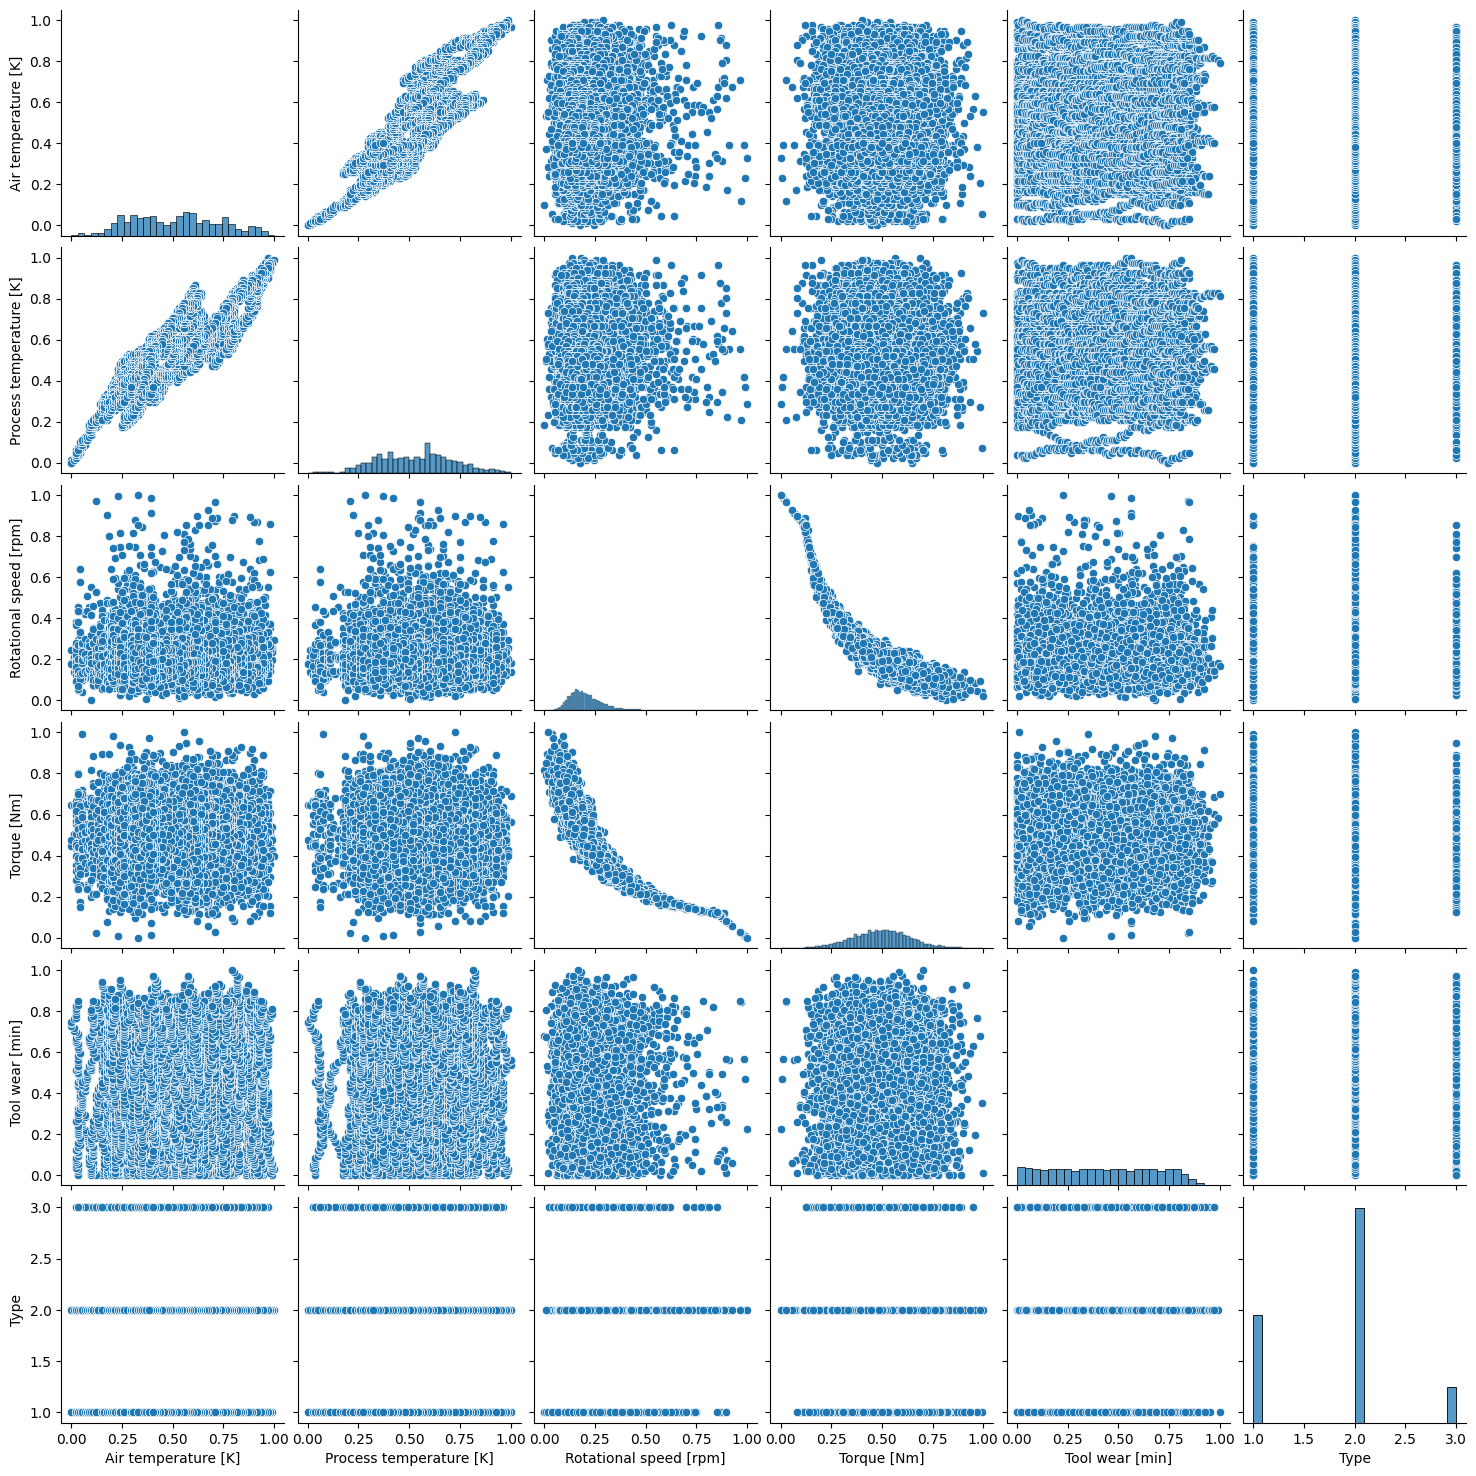

In [95]:
sns.pairplot(df)

In [96]:
df['Type'].value_counts()

Type
2    6000
1    2997
3    1003
Name: count, dtype: int64

<Axes: xlabel='Type', ylabel='count'>

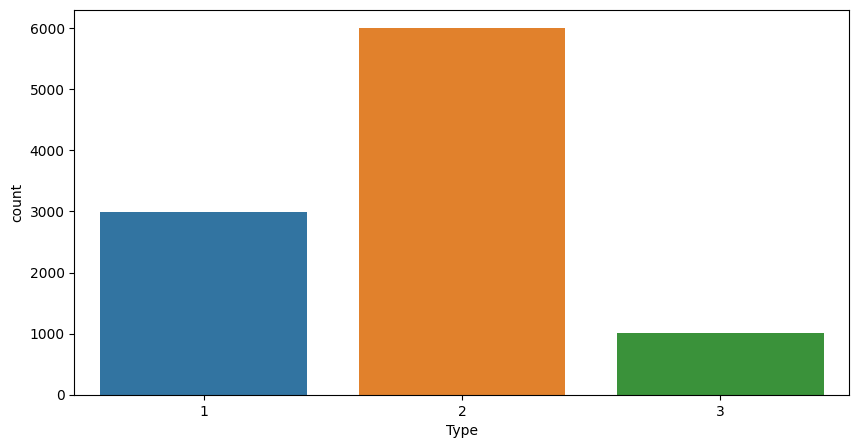

In [97]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Type')

In [98]:
df.corr()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type
Air temperature [K],1.000000,0.876107,0.022670,-0.013778,0.013853,-0.017599
Process temperature [K],0.876107,1.000000,0.019277,-0.014061,0.013488,-0.013444
Rotational speed [rpm],0.022670,0.019277,1.000000,-0.875027,0.000223,0.002693
Torque [Nm],-0.013778,-0.014061,-0.875027,1.000000,-0.003093,-0.004011
Tool wear [min],0.013853,0.013488,0.000223,-0.003093,1.000000,0.003930
Type,-0.017599,-0.013444,0.002693,-0.004011,0.003930,1.000000


<Axes: >

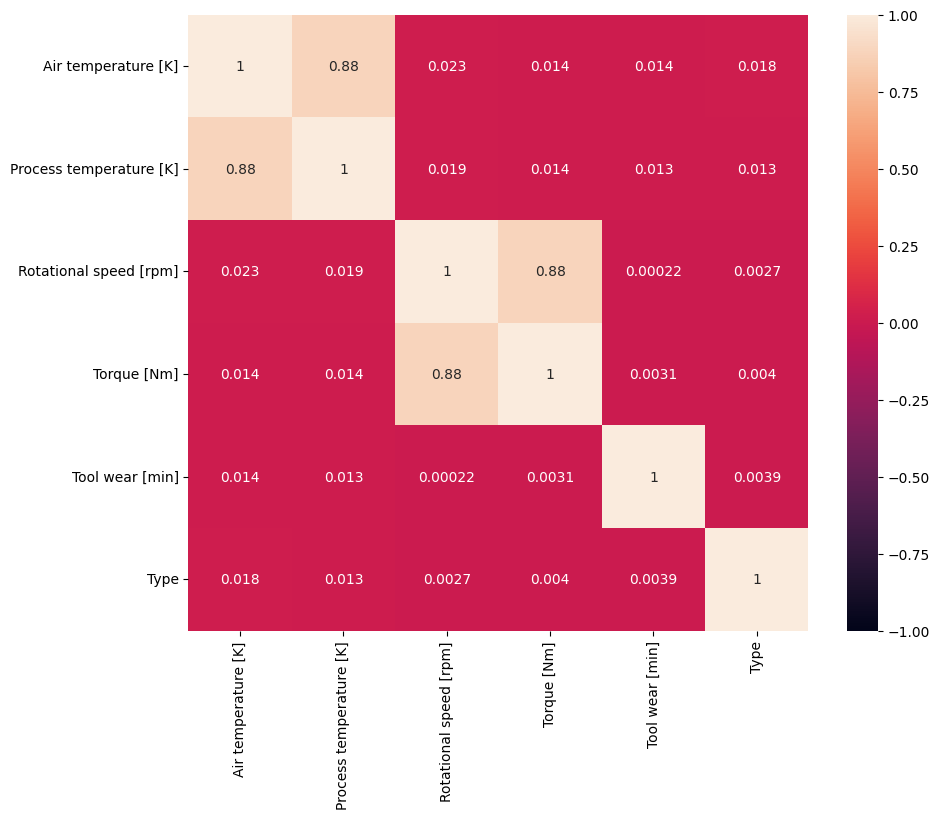

In [99]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr().abs(), vmin=-1, vmax=1, annot=True)

In [100]:
# dataset definition
class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, df):
        # store the inputs and outputs
        self.X = df.values[:, :-1]
        self.y = df.values[:, -1]
        # ensure input data is floats
        self.X = self.X.astype('float32')
        # label encode target and ensure the values are floats
        self.y = LabelEncoder().fit_transform(self.y)

    # number of rows in the dataset
    def __len__(self):
        return len(self.X)

    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    # get indexes for train and test rows
    def get_splits(self, n_test=0.33):
        # determine sizes
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        # calculate the split
        return random_split(self, [train_size, test_size])

In [101]:
# model definition
class MLP(Module):
    # define model elements
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        # input to first hidden layer
        self.hidden1 = Linear(n_inputs, 5)
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = ReLU()
        self.dropout1 = Dropout(0.2)
        # second hidden layer
        self.hidden2 = Linear(5, 8)
        kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = ReLU()
        # third hidden layer and output
        self.hidden3 = Linear(8, 3)
        xavier_uniform_(self.hidden3.weight)
        self.act3 = Softmax(dim=1)

    # forward propagate input
    def forward(self, X):
        # input to first hidden layer
        X = self.hidden1(X)
        X = self.act1(X)
        X = self.dropout1(X) 
        # second hidden layer
        X = self.hidden2(X)
        X = self.act2(X)
        # output layer
        X = self.hidden3(X)
        X = self.act3(X)
        return X

In [102]:
# prepare the dataset
def prepare_data(df):
    # load the dataset
    dataset = CSVDataset(df)
   
    # calculate split
    train, test = dataset.get_splits()
    # prepare data loaders
    train_dl = DataLoader(train, batch_size=32, shuffle=True)
    test_dl = DataLoader(test, batch_size=1024, shuffle=False)
    return train_dl, test_dl
 

In [103]:
import numpy as np
import torch

class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [111]:
number_epochs = 200 
learning_rate = 0.01
loss_per_epoch = []
loss_per_epoch_validation= []
# train the model
def train_model(train_dl, model):
    #desired_error = 10  # Set your desired error level
    #average_loss = 200
    # early stop patience
    patience = 7
    size = len(train_dl.dataset)
    # define loss function MSE 
    criterion = CrossEntropyLoss()
    # define the optimization ADAM 
    # regularization L2 = weight_decay
    optimizer =  Adam(model.parameters(), lr=learning_rate , weight_decay= 0.01)
    epoch = 0 
    # Early stop object
    early_stopping = EarlyStopping(patience=patience, verbose=True)
    # enumerate epochs
    #while(average_loss >= desired_error): # accroding to loss function do epochs 
    for epoch in tqdm(range(number_epochs),desc='Training Epochs'):
        print(f"Epoch {epoch+1}\n-------------------------------") # enumerate mini batches
        # training data 
        total_loss = 0.0
        model.train()
        TrainigStep_loss = []
        for batch, (inputs, targets) in enumerate(train_dl):
            
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            #print("y befor" , inputs)
            # calculate loss
            loss = criterion(yhat, targets)
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()
            TrainigStep_loss.append(loss.item())
            #total_loss += loss.item()
        
        #average_loss = total_loss / len(train_dl)
        loss = np.array(TrainigStep_loss).mean()
        loss_per_epoch.append(loss)
        print(f"loss: {loss:>7f}")
        #print(f"Average loss :{average_loss:>7f}" )
        
        # test / validation data 
        model.eval()     # Optional when not using Model Specific layer
        validationStep_loss = []
        for batch, (inputs, targets) in enumerate(test_dl):
            
            # Forward Pass
            outputs = model(inputs)
            # Find the Loss
            validation_loss = criterion(outputs, targets)
            # Calculate Loss
            validationStep_loss.append(validation_loss.item())
            
        loss_per_epoch_validation.append(np.array(validationStep_loss).mean())
        
        # print training/validation statistics 
        # calculate average loss over an epoch
        train_loss = np.average(TrainigStep_loss)
        valid_loss = np.average(validationStep_loss)
        
        # early stopping
        early_stopping(valid_loss, model)
        
        if early_stopping.early_stop:
            print("Early stopping")
            break
        '''
        early_stopper = EarlyStopper(patience=3, min_delta=10)
        if early_stopper.early_stop(np.array(loss_per_epoch_validation).mean()):  
            print("Early stop lunched " ,epoch )
            break
        '''
        #epoch+=1


In [105]:
# evaluate the model
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        # convert to class labels
        yhat = argmax(yhat, axis=1)
        # reshape for stacking
        actual = actual.reshape((len(actual), 1))
        yhat = yhat.reshape((len(yhat), 1))
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    # calculate accuracy
    acc = accuracy_score(actuals, predictions)
    return acc

In [106]:
# make a class prediction for one row of data
def predict(row, model):
    # convert row to data
    row = Tensor([row])
    # make prediction
    yhat = model(row)
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    return yhat


In [112]:
# prepare the data
train_dl, test_dl = prepare_data(df)
print(len(train_dl.dataset), len(test_dl.dataset))
# define the network
model = MLP(5)
# train the model
train_model(train_dl, model)

6700 3300


Training Epochs:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 1
-------------------------------


Training Epochs:   0%|          | 1/200 [00:00<01:11,  2.78it/s]

loss: 0.970035
Validation loss decreased (inf --> 0.955814).  Saving model ...
Epoch 2
-------------------------------


Training Epochs:   1%|          | 2/200 [00:00<01:11,  2.77it/s]

loss: 0.954041
Validation loss decreased (0.955814 --> 0.955772).  Saving model ...
Epoch 3
-------------------------------


Training Epochs:   2%|▏         | 3/200 [00:01<01:10,  2.78it/s]

loss: 0.955235
EarlyStopping counter: 1 out of 7
Epoch 4
-------------------------------


Training Epochs:   2%|▏         | 4/200 [00:01<01:10,  2.78it/s]

loss: 0.954768
EarlyStopping counter: 2 out of 7
Epoch 5
-------------------------------


Training Epochs:   2%|▎         | 5/200 [00:01<01:10,  2.79it/s]

loss: 0.954398
EarlyStopping counter: 3 out of 7
Epoch 6
-------------------------------


Training Epochs:   3%|▎         | 6/200 [00:02<01:09,  2.77it/s]

loss: 0.955096
Validation loss decreased (0.955772 --> 0.955758).  Saving model ...
Epoch 7
-------------------------------


Training Epochs:   4%|▎         | 7/200 [00:02<01:09,  2.78it/s]

loss: 0.955041
EarlyStopping counter: 1 out of 7
Epoch 8
-------------------------------


Training Epochs:   4%|▍         | 8/200 [00:02<01:09,  2.78it/s]

loss: 0.954617
Validation loss decreased (0.955758 --> 0.955142).  Saving model ...
Epoch 9
-------------------------------


Training Epochs:   4%|▍         | 9/200 [00:03<01:08,  2.80it/s]

loss: 0.954530
EarlyStopping counter: 1 out of 7
Epoch 10
-------------------------------


Training Epochs:   5%|▌         | 10/200 [00:03<01:07,  2.81it/s]

loss: 0.954316
EarlyStopping counter: 2 out of 7
Epoch 11
-------------------------------


Training Epochs:   6%|▌         | 11/200 [00:03<01:07,  2.82it/s]

loss: 0.954619
EarlyStopping counter: 3 out of 7
Epoch 12
-------------------------------


Training Epochs:   6%|▌         | 12/200 [00:04<01:06,  2.83it/s]

loss: 0.954577
EarlyStopping counter: 4 out of 7
Epoch 13
-------------------------------


Training Epochs:   6%|▋         | 13/200 [00:04<01:06,  2.83it/s]

loss: 0.953988
EarlyStopping counter: 5 out of 7
Epoch 14
-------------------------------


Training Epochs:   7%|▋         | 14/200 [00:04<01:05,  2.83it/s]

loss: 0.954931
EarlyStopping counter: 6 out of 7
Epoch 15
-------------------------------


Training Epochs:   7%|▋         | 14/200 [00:05<01:11,  2.61it/s]

loss: 0.953886
EarlyStopping counter: 7 out of 7
Early stopping


In [113]:
# evaluate the model
acc = evaluate_model(test_dl, model)
print('Accuracy: %.3f' % acc)

Accuracy: 0.602


In [116]:
#. loss function curve 
import plotly.graph_objects as go

# Assuming you have loss_per_epoch and loss_per_epoch_validation lists
#loss_per_epoch = [0.5, 0.4, 0.3]  # Replace with your actual list
#loss_per_epoch_validation = [0.6, 0.5, 0.4]  # Replace with your actual list

# Create the figure
fig = go.Figure()

# Add training loss trace
fig.add_trace(go.Scatter(x=list(range(len(loss_per_epoch))),
                         y=loss_per_epoch,
                         mode='lines',
                         name='train'))

# Add validation loss trace
fig.add_trace(go.Scatter(x=list(range(len(loss_per_epoch_validation))),
                         y=loss_per_epoch_validation,
                         mode='lines',
                         name='test'))

# Add labels and title
fig.update_layout(title='model loss',
                  xaxis=dict(title='epoch'),
                  yaxis=dict(title='loss'))

# Show the figure
fig.show()
#fig.write_image("LOSS_DNN_(30,20,10,1).svg")